In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
sns.set_theme()

In [33]:
E_commerce_data = pd.read_csv("F:\\@BDA\\PDS\\PROJECT\\SURVEY_DATA_ON_ECOMMERCE_SITES.csv")

In [34]:
E_commerce_data

,Timestamp,Age,Gender,Highest Educational Qualification,Do you have any subscription on any E-Commerce site?,Which Types of product you prefer to buy from E-Commerce sites?,"On a scale of 0-5, how much does an overall product rating affect your purchase decision?",Do you generally find various alternatives for the same product in your affordable range?,"On a scale of 0-5 how much will you rate the customer service(Delivery process , after sale service, return policy)",Do you often receive damage products or different products which you have ordered?,Do you find any price difference between online and offline products?,On a scale of 0-5 how much will you prefer others for online shopping?,"On an average, yearly (approximately), how many products you bought from E-commerce sites on pre-Covid situation?","On an average, yearly (approximately), how many products you buy from E-commerce sites on post-Covid situation?",Which e-commerce sites you prefer for buying electronics product?,Which e-commerce sites you prefer for purchasing Garments?,Which e-commerce sites you prefer for buying grocery items?,Email Address,"Which e-commerce sites you prefer for buying educational products(books, Pens, paper etc.)?"
0,10/4/2021 16:24:27,21,Male,Graduate,Yes,"Electronics, Educational Materials",4,Yes,4,Never,Online Price is greater,5,5,8,Amazon,Myntra,Big Basket,NaN,Amazon
1,10/5/2021 10:27:02,21,Male,Graduate,Yes,"Electronics, Educational Materials",4,Yes,4,Never,Almost same,4,6,3,Flipkart,Myntra,Grofers,NaN,NaN
2,10/5/2021 11:15:06,21,Male,Graduate,Yes,"Electronics, Educational Materials, Others",4,Yes,5,Never,Online Price is greater,4,4,6,Amazon,Myntra,Big Basket,NaN,NaN
3,10/5/2021 11:26:37,21,Male,Graduate,Yes,"Electronics, Garments, Educational Materials",4,Yes,3,Never,Offline Price is greater,5,6,10,Amazon,Myntra,Grofers,NaN,NaN
4,10/5/2021 16:43:34,21,Male,Higher Secondary,No,"Electronics, Fashion Product",4,Yes,5,Never,Offline Price is greater,4,2,2,Flipkart,Myntra,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,11/29/2021 18:48:15,20,Male,Graduate,Yes,"Electronics, Garments, Educational Materials, ...",4,No,4,Some times,Online Price is greater,5,7,14,Flipkart,Myntra,Grofers,NaN,NaN
122,11/29/2021 18:50:33,21,Female,Graduate,Yes,"Electronics, Educational Materials",3,No,4,Some times,Almost same,5,9,15,Others,Meesho,Big Basket,NaN,NaN
123,11/29/2021 18:53:39,27,Female,Post Graduate and above,Yes,"Electronics, Garments",5,No,5,Never,Almost same,4,12,24,Flipkart,Myntra,Grofers,NaN,NaN
124,11/29/2021 20:31:25,34,Female,Post Graduate and above,Yes,Electronics,4,Yes,4,Never,Online Price is greater,4,8,16,Amazon,Meesho,Amazon,NaN,NaN


In [35]:
E_commerce_data = E_commerce_data.rename({"Highest Educational Qualification":"Qualification",
                                         "On a scale of 0-5 how much will you rate the customer service(Delivery process , after sale service, return policy)":"C_service",
                                         "Do you have any subscription on any E-Commerce site?":"Subscription"}, axis = 1)

In [36]:
data = pd.DataFrame(columns=["Subscription", "Customer_Service"])

In [37]:
data.Subscription = E_commerce_data.Subscription
data.Customer_Service = E_commerce_data.C_service
data

,Subscription,Customer_Service
0,Yes,4
1,Yes,4
2,Yes,5
3,Yes,3
4,No,5
...,...,...
121,Yes,4
122,Yes,4
123,Yes,5
124,Yes,4


In [38]:
data["val"] = 1; data

,Subscription,Customer_Service,val
0,Yes,4,1
1,Yes,4,1
2,Yes,5,1
3,Yes,3,1
4,No,5,1
...,...,...,...
121,Yes,4,1
122,Yes,4,1
123,Yes,5,1
124,Yes,4,1


In [39]:
df = pd.DataFrame(data.groupby(["Subscription", "Customer_Service"]).sum()); df

val
Subscription Customer_Service     
No           0                   1
             1                   1
             3                  15
             4                  40
             5                  11
Yes          2                   2
             3                  11
             4                  33
             5                  12

In [40]:
df2 = df.groupby("Subscription").sum(); df2

,val
Subscription,
No,68
Yes,58


In [41]:
data2 = pd.DataFrame(columns=["Subscription", "Rating"])
row_list = []
for i,j in df.index:
    dict1 = {}
    dict1.update({"Subscription": i, "Rating":j})
    row_list.append(dict1)
df1 = pd.DataFrame(row_list); df1
    

,Subscription,Rating
0,No,0
1,No,1
2,No,3
3,No,4
4,No,5
5,Yes,2
6,Yes,3
7,Yes,4
8,Yes,5


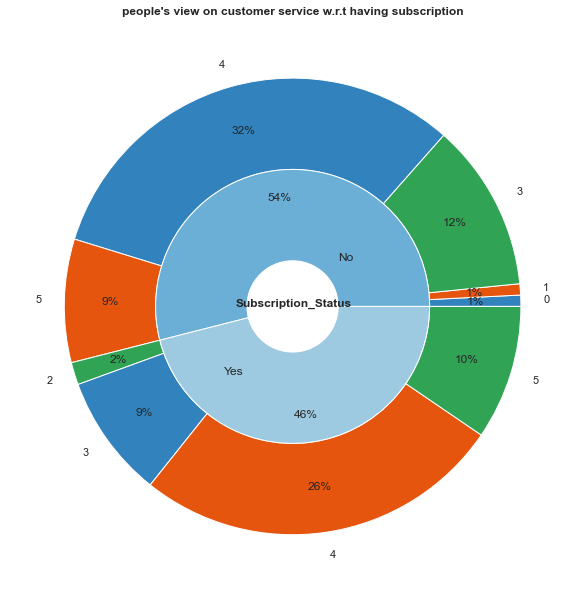

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5,10.5, forward = True)
size = 0.4
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(df.val, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels = df1.Rating, autopct = "%1.0f%%",
      pctdistance = 0.8)

ax.pie(df2.val, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct = "%1.0f%%",
      pctdistance = 0.8)

plt.title("people's view on customer service w.r.t having subscription", fontweight = "bold")
ax.text(0.2,0.2,"No")
ax.text(-0.25,0,"Subscription_Status", fontweight = "bold")
ax.text(-0.3,-0.3,"Yes")
plt.show()

fig.savefig('12.png',facecolor='lightgrey',transparent=True)